In [1]:
import numpy as np 
from orbit_util import Orbit_2body

In [2]:
# Initial Conditions
X_0 = -2500  # [km]
Y_0 = -5500  # [km]
Z_0 = 3400  # [km]
VX_0 = 7.5  # [km/s]
VY_0 = 0.0  # [km/s]
VZ_0 = 4.0  # [km/s]
state_0 = [X_0, Y_0, Z_0, VX_0, VY_0, VZ_0]

In [3]:
orbit = Orbit_2body()

In [10]:
r, t =orbit.propagate_init_cond(T = 6*3600, time_step = 10, R0 = state_0[0:3], V0 =state_0[3:6])

In [6]:
# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6378.14  # Average radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)


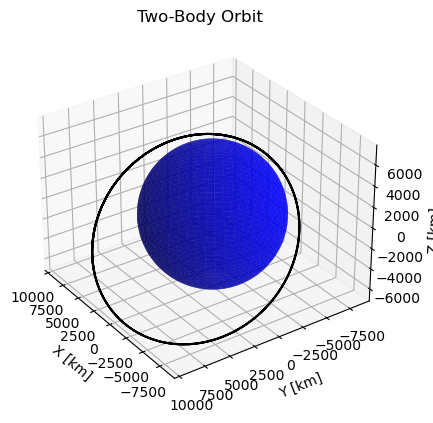

In [13]:
# Plotting Earth and Orbit
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.7)
ax.plot3D(r[:,0], r[:,1], r[:,2], 'black')
ax.view_init(30, 145)  # Changing viewing angle (adjust as needed)
plt.title('Two-Body Orbit')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]')

# Make axes limits
xyzlim = np.array([ax.get_xlim3d(), ax.get_ylim3d(),      
                   ax.get_zlim3d()]).T
XYZlim = np.asarray([min(xyzlim[0]), max(xyzlim[1])])
ax.set_xlim3d(XYZlim)
ax.set_ylim3d(XYZlim)
ax.set_zlim3d(XYZlim * 3/4)
plt.show()


In [12]:
r.shape

(2160, 6)